In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2020-12-03T17:00:00,6,Friuli Venezia Giulia,629,59,688,14195,14883,190,772,...,52.0,9970.0,4347.0,212.0,8.58,4.62,7.74,17.76,1.72,1.29
283,2020-12-04T17:00:00,6,Friuli Venezia Giulia,632,59,691,14482,15173,290,1040,...,36.0,9370.0,2706.0,287.0,8.54,4.55,11.10,38.43,0.00,1.95
284,2020-12-05T17:00:00,6,Friuli Venezia Giulia,640,58,698,14366,15064,-109,755,...,31.0,7853.0,2336.0,-116.0,8.31,4.63,9.61,32.32,-1.69,-0.72
285,2020-12-06T17:00:00,6,Friuli Venezia Giulia,652,59,711,14320,15031,-33,702,...,27.0,6227.0,1216.0,-46.0,8.30,4.73,11.27,57.73,1.72,-0.22


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 7, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 359
Nuovi tamponi: 3981.0
Percentuale nuovi positivi/nuovi tamponi: 9.0 %
Nuovi guariti: 497.0
Nuovi deceduti: 24.0
Variazione positivi ricoverati con sintomi: 13.0
Variazione positivi in terapia intensiva: -1.0
Variazione positivi in isolamento dimiciliare: -174.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 7, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-08T17:00:00,6,Friuli Venezia Giulia,23,6,29,991,1020,75,110,...,0.0,4953.0,2251.0,78.0,20.69,2.84,2.22,4.89,0.00,7.94
1,2020-10-09T17:00:00,6,Friuli Venezia Giulia,23,6,29,1112,1141,121,146,...,0.0,4307.0,1625.0,121.0,20.69,2.54,3.39,8.98,0.00,11.86
2,2020-10-10T17:00:00,6,Friuli Venezia Giulia,23,6,29,1215,1244,103,126,...,0.0,4269.0,1998.0,103.0,20.69,2.33,2.95,6.31,0.00,9.03
3,2020-10-11T17:00:00,6,Friuli Venezia Giulia,22,5,27,1296,1323,79,97,...,1.0,1694.0,800.0,81.0,18.52,2.04,5.73,12.12,-16.67,6.35
4,2020-10-12T17:00:00,6,Friuli Venezia Giulia,22,5,27,1345,1372,49,59,...,0.0,1696.0,1036.0,49.0,18.52,1.97,3.48,5.69,0.00,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-03T17:00:00,6,Friuli Venezia Giulia,629,59,688,14195,14883,190,772,...,52.0,9970.0,4347.0,212.0,8.58,4.62,7.74,17.76,1.72,1.29
57,2020-12-04T17:00:00,6,Friuli Venezia Giulia,632,59,691,14482,15173,290,1040,...,36.0,9370.0,2706.0,287.0,8.54,4.55,11.10,38.43,0.00,1.95
58,2020-12-05T17:00:00,6,Friuli Venezia Giulia,640,58,698,14366,15064,-109,755,...,31.0,7853.0,2336.0,-116.0,8.31,4.63,9.61,32.32,-1.69,-0.72
59,2020-12-06T17:00:00,6,Friuli Venezia Giulia,652,59,711,14320,15031,-33,702,...,27.0,6227.0,1216.0,-46.0,8.30,4.73,11.27,57.73,1.72,-0.22


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

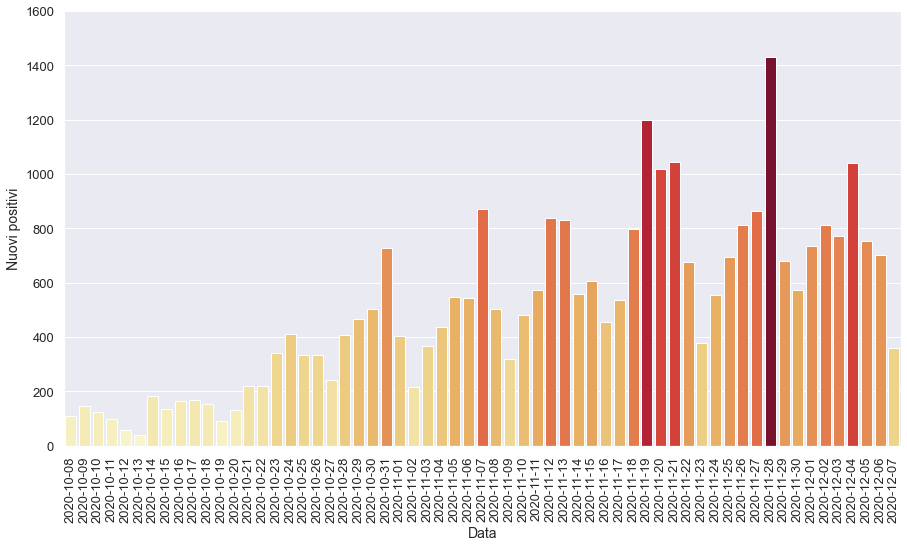

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

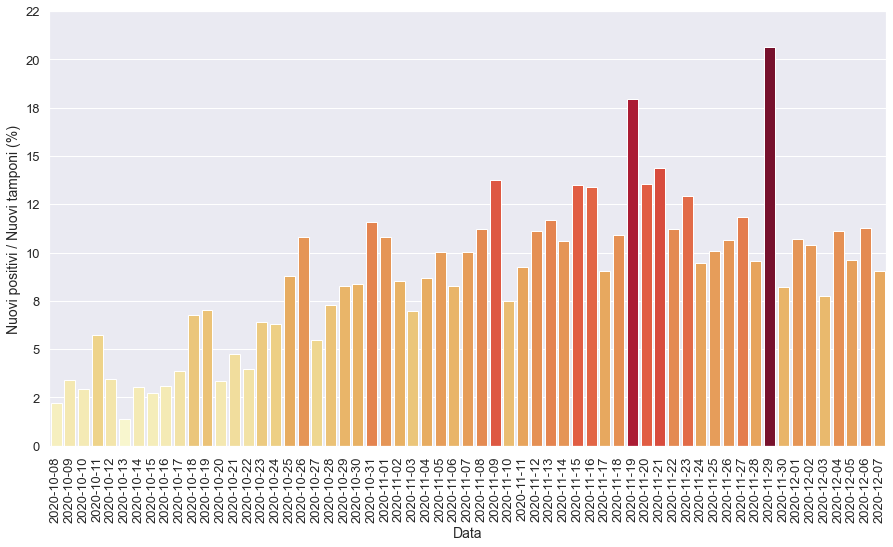

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

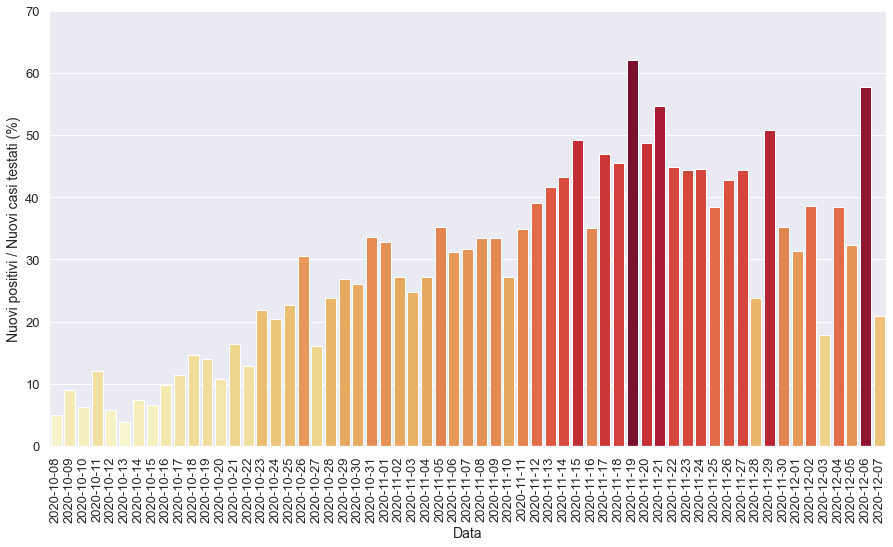

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

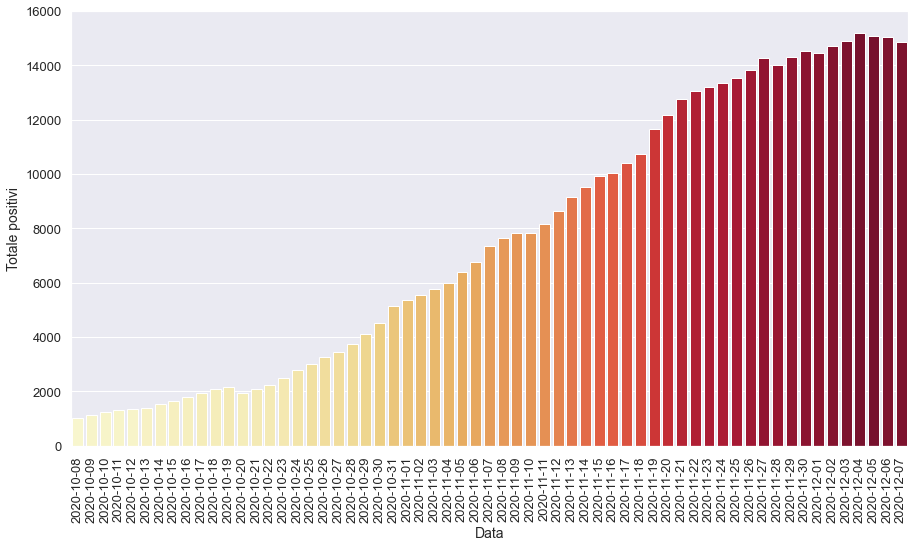

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

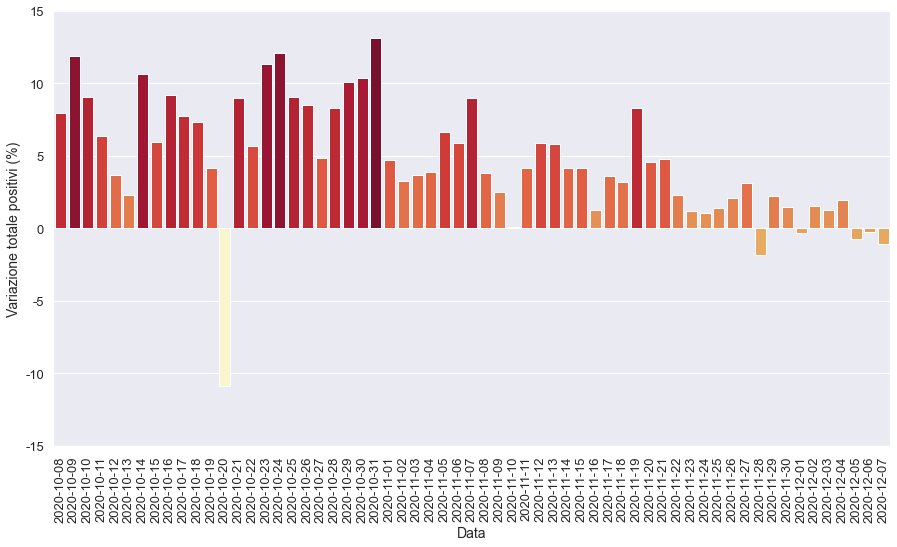

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

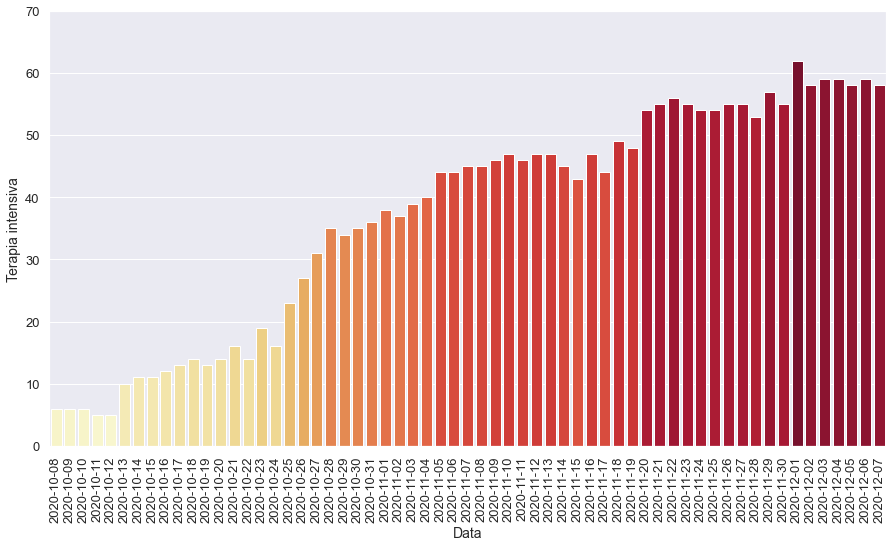

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

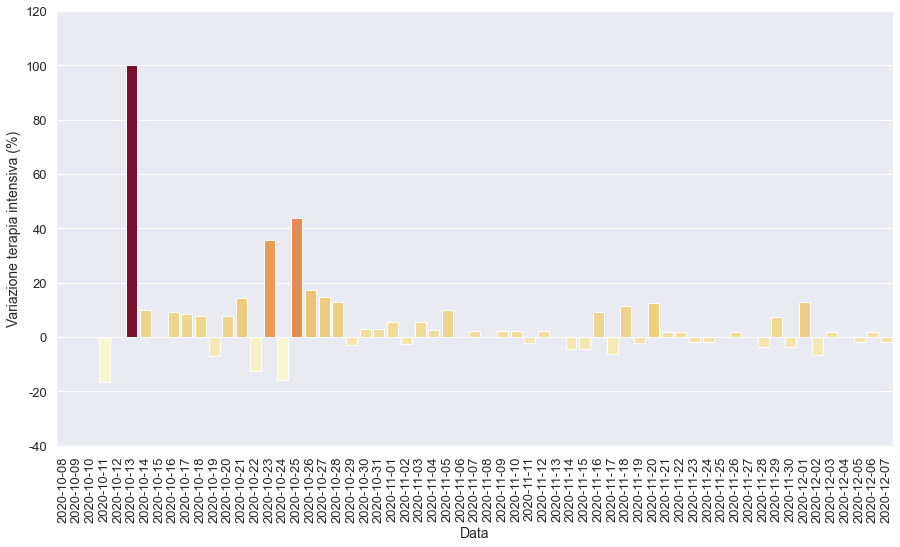

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

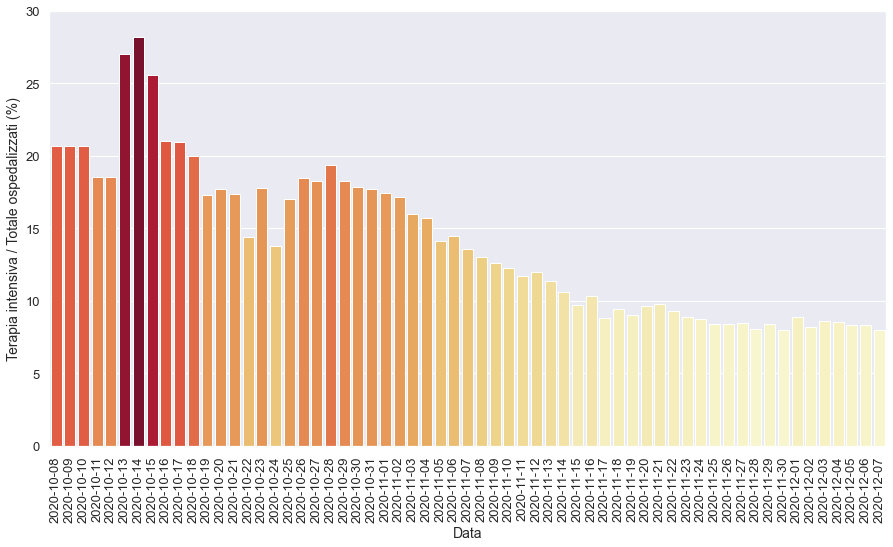

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

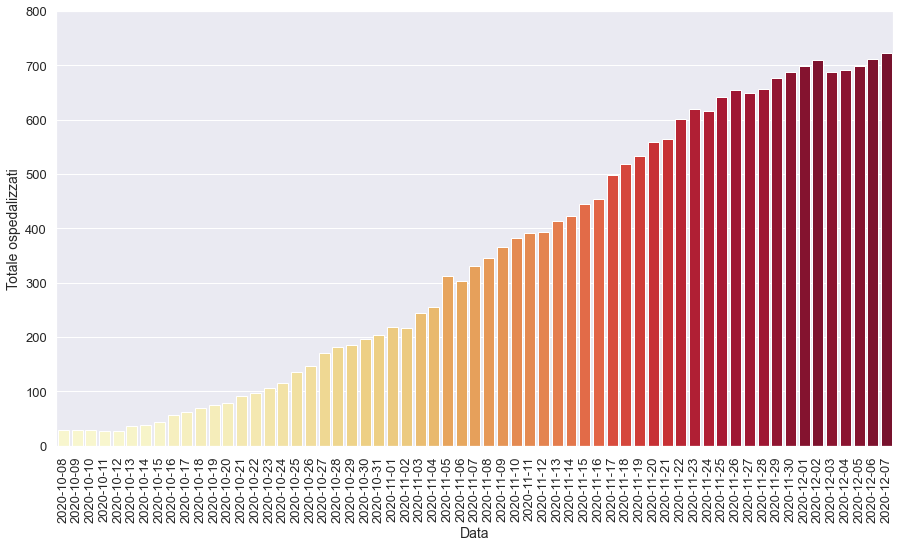

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

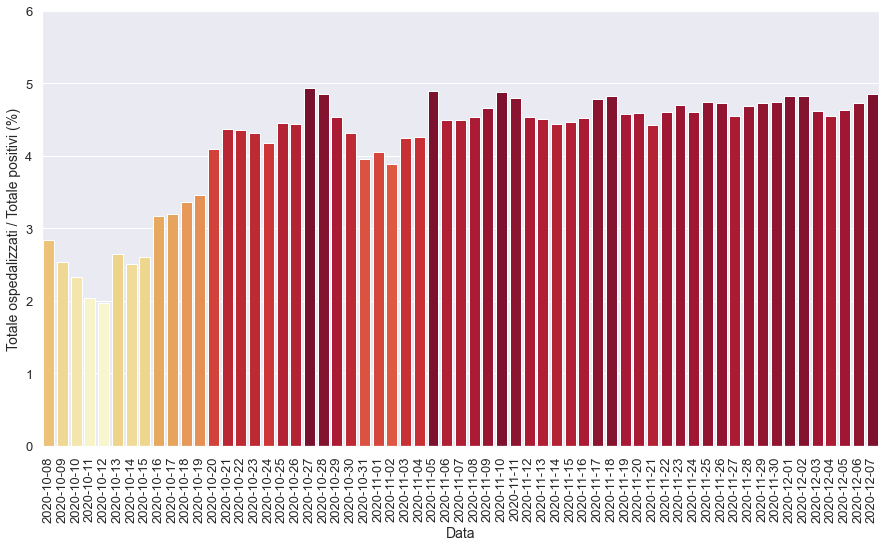

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

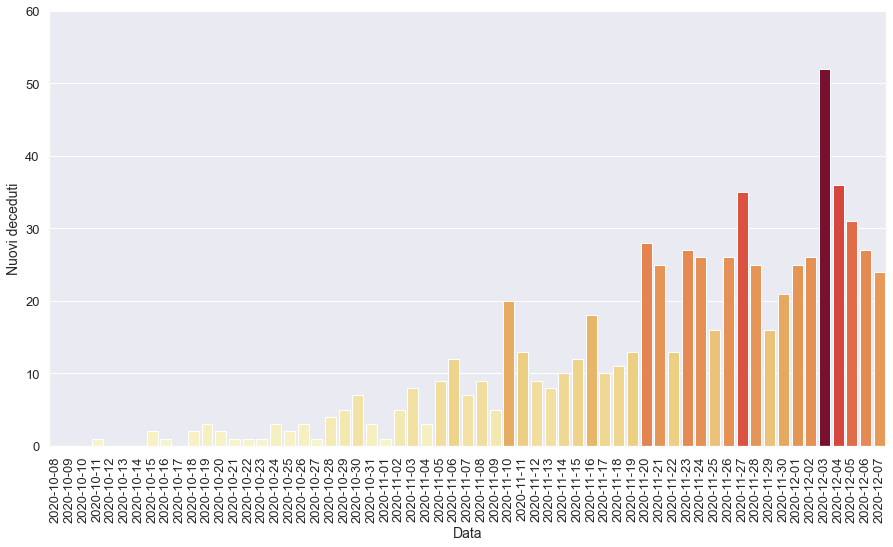

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

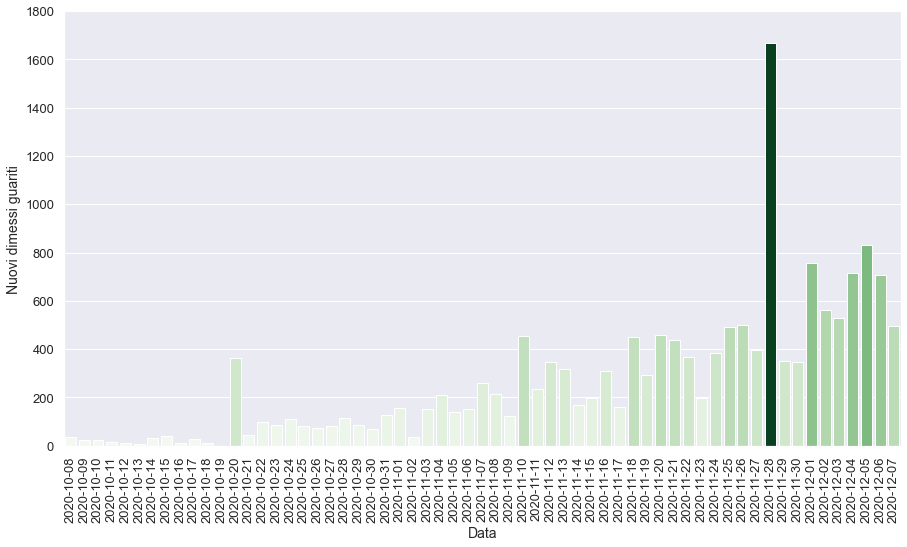

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-07T17:00:00,6,Friuli Venezia Giulia,286,45,331,7029,7360,605,872,...,7.0,8692.0,2756.0,578.0,13.60,4.50,10.03,31.64,2.27,8.96
1,2020-11-08T17:00:00,6,Friuli Venezia Giulia,301,45,346,7295,7641,281,504,...,9.0,4486.0,1509.0,266.0,13.01,4.53,11.23,33.40,0.00,3.82
2,2020-11-09T17:00:00,6,Friuli Venezia Giulia,319,46,365,7467,7832,191,320,...,5.0,2324.0,955.0,172.0,12.60,4.66,13.77,33.51,2.22,2.50
3,2020-11-10T17:00:00,6,Friuli Venezia Giulia,336,47,383,7458,7841,9,482,...,20.0,6438.0,1775.0,-9.0,12.27,4.88,7.49,27.15,2.17,0.11
4,2020-11-11T17:00:00,6,Friuli Venezia Giulia,346,46,392,7773,8165,324,572,...,13.0,6171.0,1641.0,315.0,11.73,4.80,9.27,34.86,-2.13,4.13
5,2020-11-12T17:00:00,6,Friuli Venezia Giulia,346,47,393,8254,8647,482,838,...,9.0,7529.0,2141.0,481.0,11.96,4.54,11.13,39.14,2.17,5.90
6,2020-11-13T17:00:00,6,Friuli Venezia Giulia,366,47,413,8738,9151,504,831,...,8.0,7121.0,1996.0,484.0,11.38,4.51,11.67,41.63,0.00,5.83
7,2020-11-14T17:00:00,6,Friuli Venezia Giulia,378,45,423,9106,9529,378,558,...,10.0,5271.0,1290.0,368.0,10.64,4.44,10.59,43.26,-4.26,4.13
8,2020-11-15T17:00:00,6,Friuli Venezia Giulia,401,43,444,9483,9927,398,608,...,12.0,4505.0,1237.0,377.0,9.68,4.47,13.50,49.15,-4.44,4.18
9,2020-11-16T17:00:00,6,Friuli Venezia Giulia,407,47,454,9601,10055,128,456,...,18.0,3411.0,1298.0,118.0,10.35,4.52,13.37,35.13,9.30,1.29


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

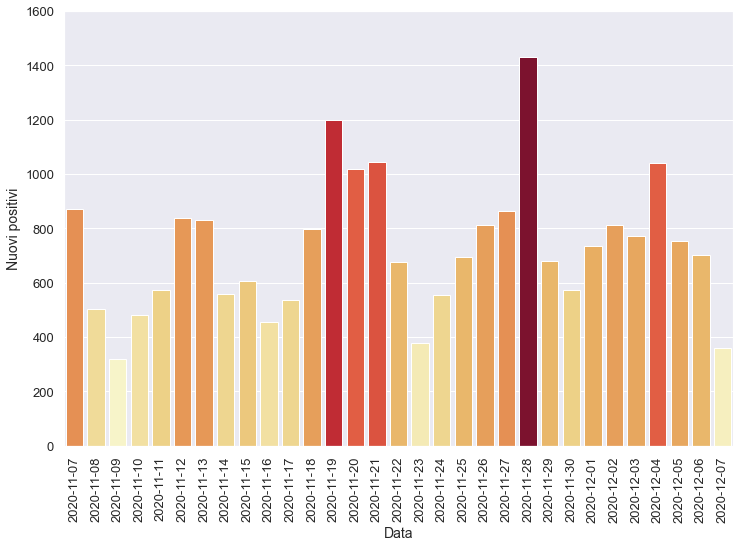

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

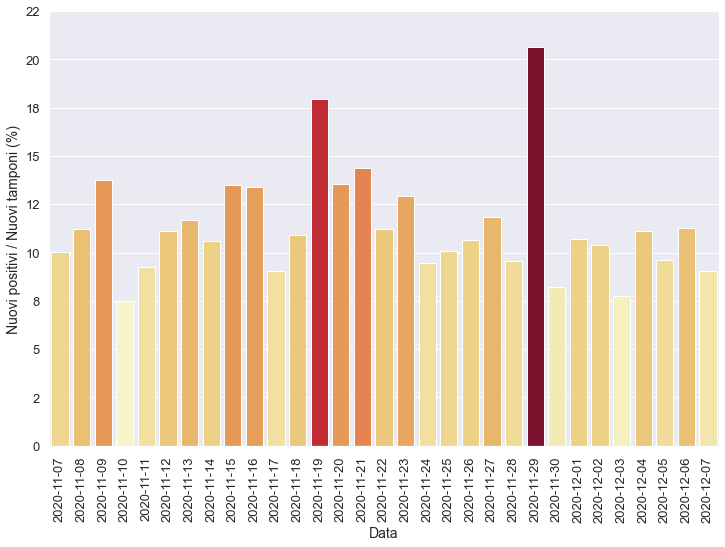

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

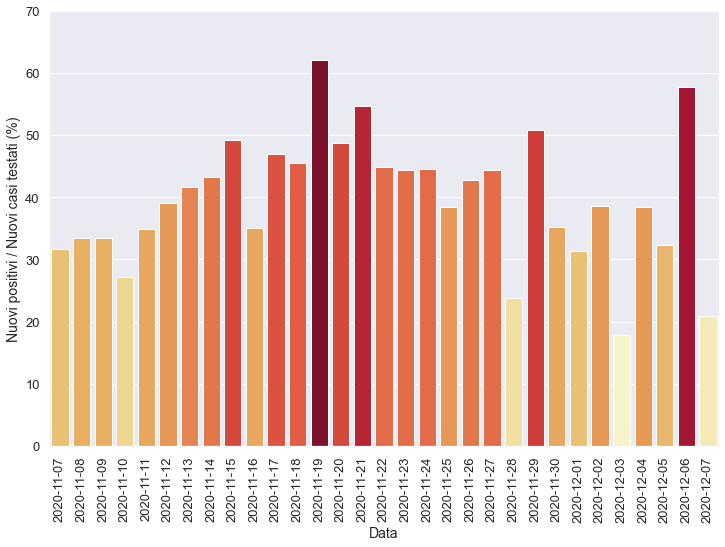

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

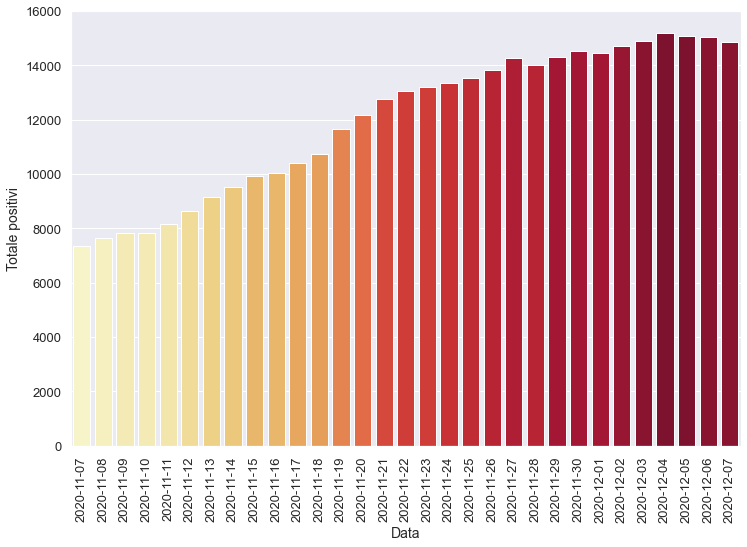

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

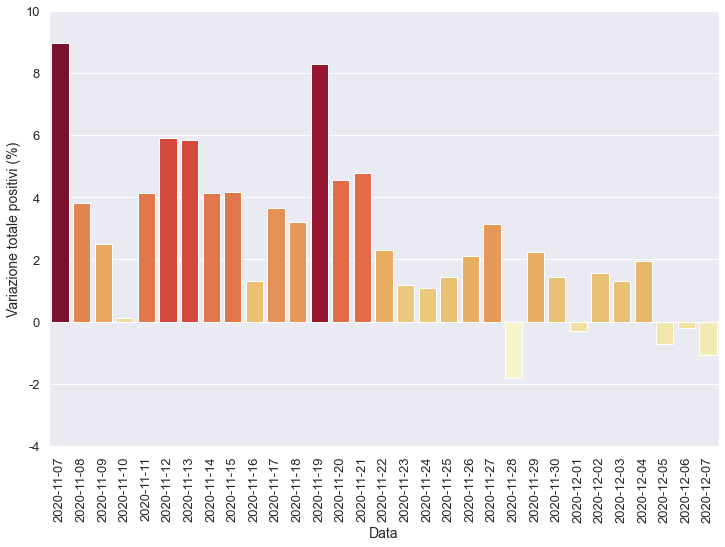

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

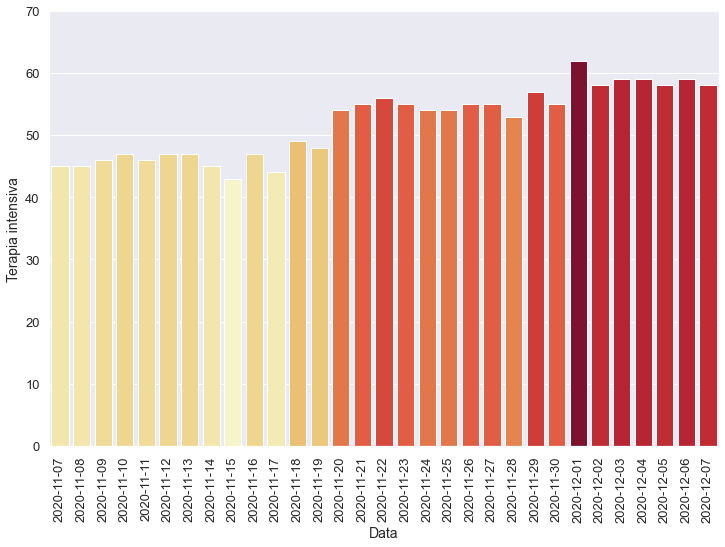

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

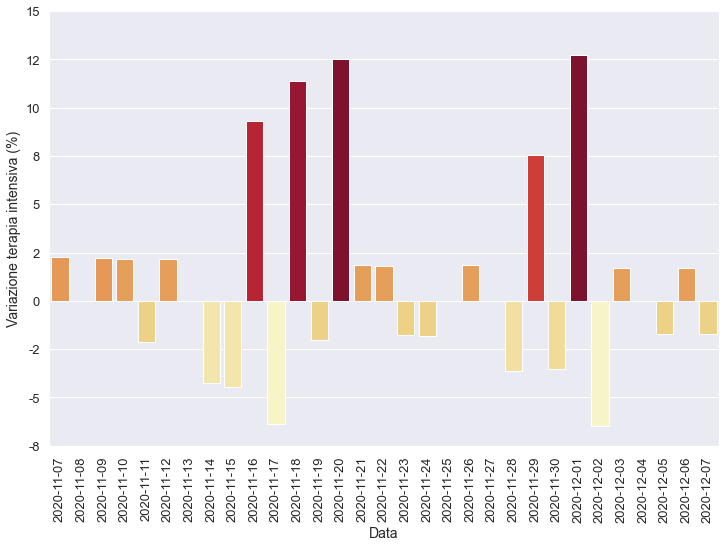

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

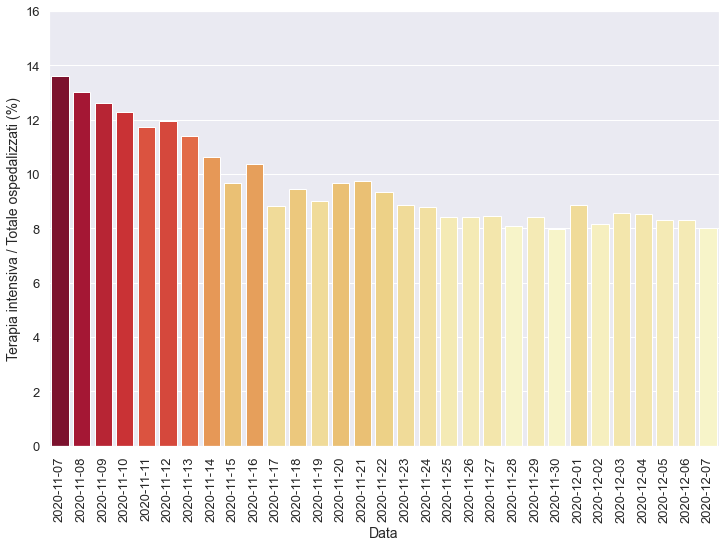

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

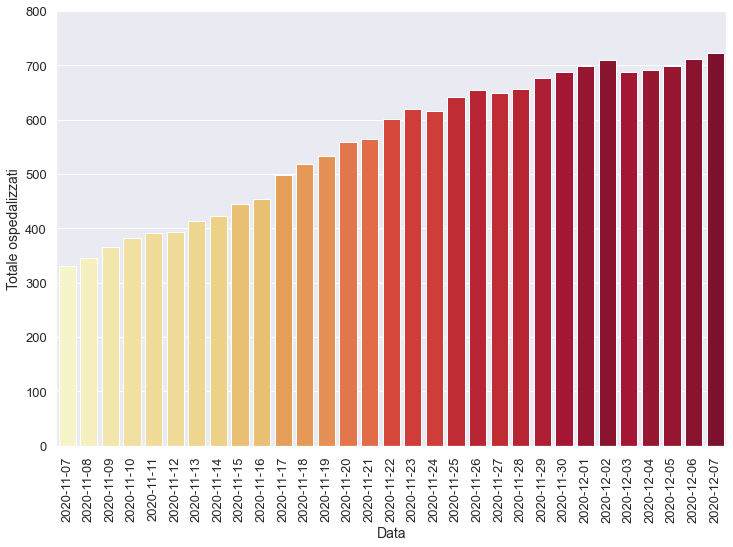

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

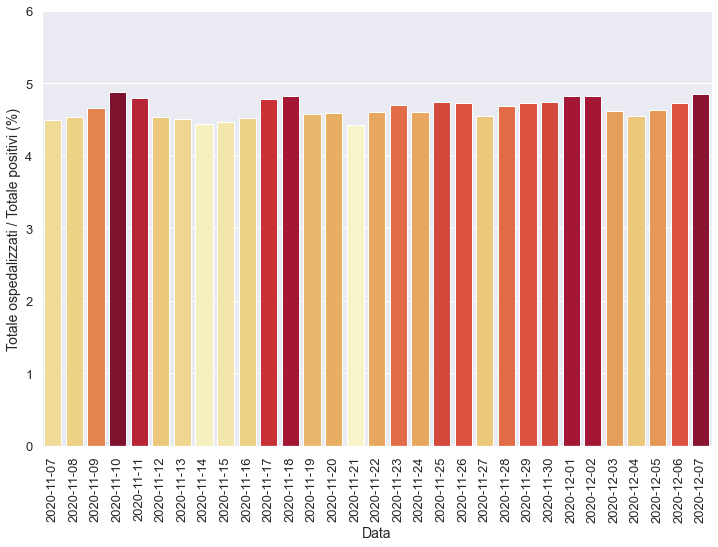

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

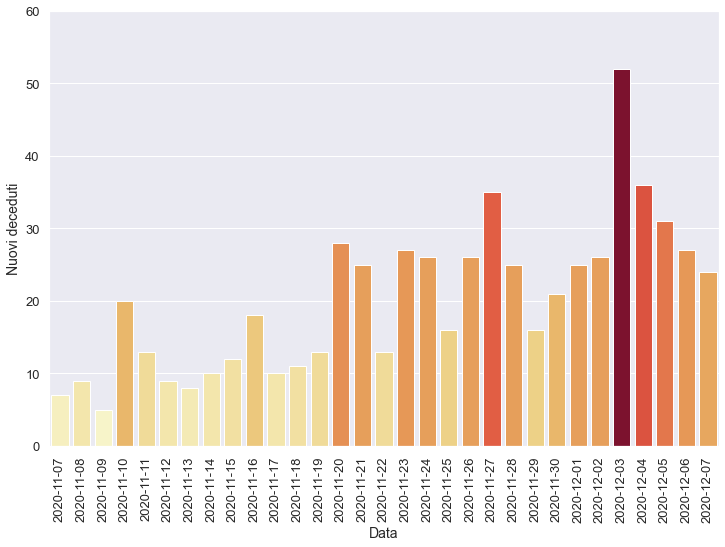

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

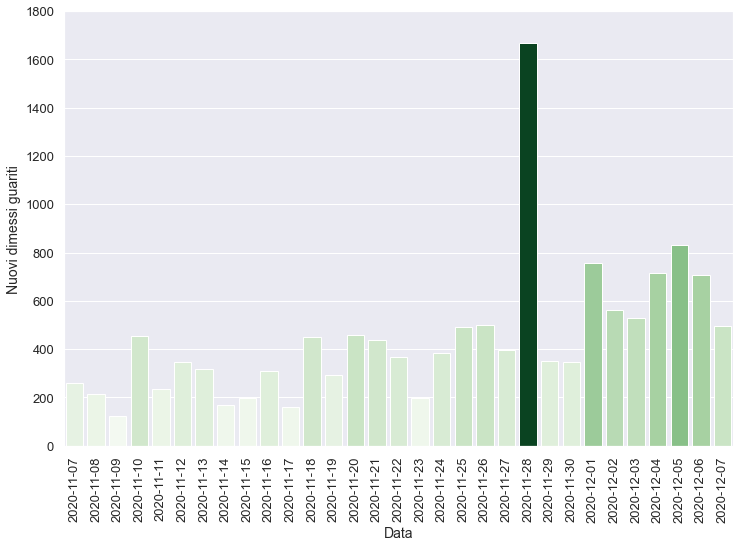

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-30T17:00:00,6,Friuli Venezia Giulia,633,55,688,13827,14515,206,575,...,21.0,6980.0,1636.0,195.0,7.99,4.74,8.24,35.15,-3.51,1.44
1,2020-12-01T17:00:00,6,Friuli Venezia Giulia,637,62,699,13769,14468,-47,736,...,25.0,6870.0,2346.0,-58.0,8.87,4.83,10.71,31.37,12.73,-0.32
2,2020-12-02T17:00:00,6,Friuli Venezia Giulia,652,58,710,13983,14693,225,812,...,26.0,7820.0,2100.0,214.0,8.17,4.83,10.38,38.67,-6.45,1.56
3,2020-12-03T17:00:00,6,Friuli Venezia Giulia,629,59,688,14195,14883,190,772,...,52.0,9970.0,4347.0,212.0,8.58,4.62,7.74,17.76,1.72,1.29
4,2020-12-04T17:00:00,6,Friuli Venezia Giulia,632,59,691,14482,15173,290,1040,...,36.0,9370.0,2706.0,287.0,8.54,4.55,11.10,38.43,0.00,1.95
5,2020-12-05T17:00:00,6,Friuli Venezia Giulia,640,58,698,14366,15064,-109,755,...,31.0,7853.0,2336.0,-116.0,8.31,4.63,9.61,32.32,-1.69,-0.72
6,2020-12-06T17:00:00,6,Friuli Venezia Giulia,652,59,711,14320,15031,-33,702,...,27.0,6227.0,1216.0,-46.0,8.30,4.73,11.27,57.73,1.72,-0.22
7,2020-12-07T17:00:00,6,Friuli Venezia Giulia,665,58,723,14146,14869,-162,359,...,24.0,3981.0,1720.0,-174.0,8.02,4.86,9.02,20.87,-1.69,-1.08


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

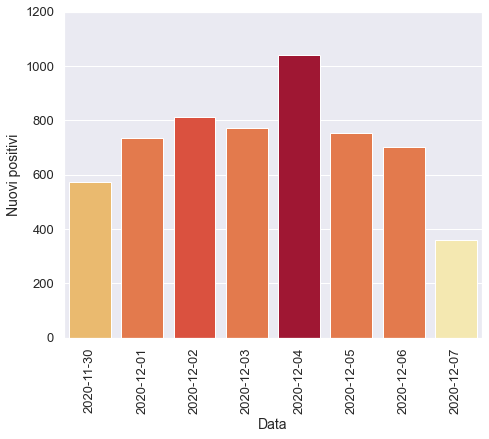

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

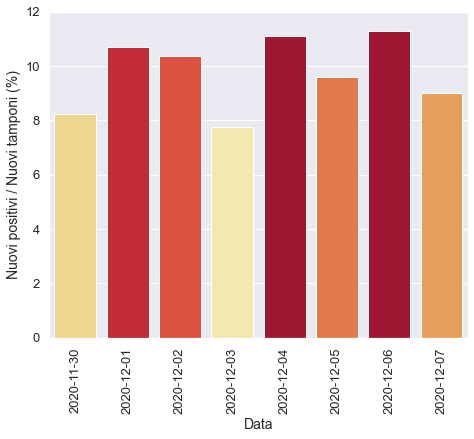

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

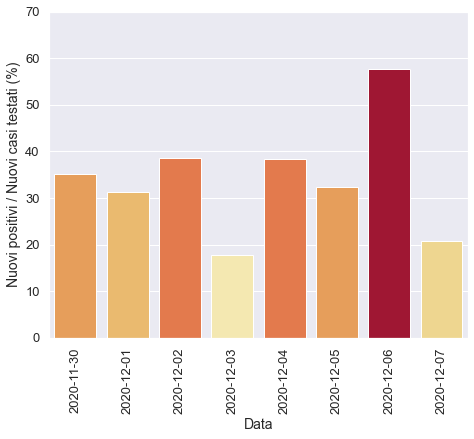

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

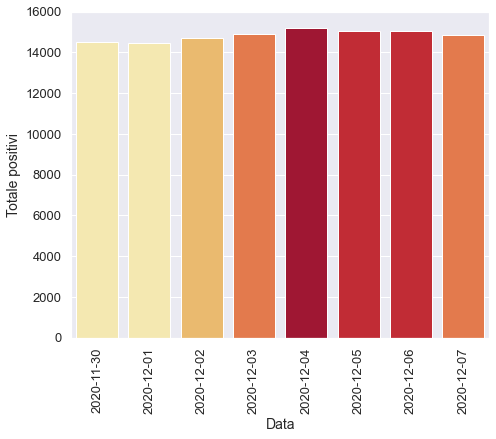

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

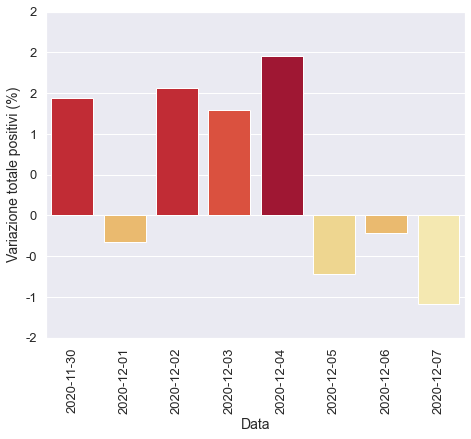

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

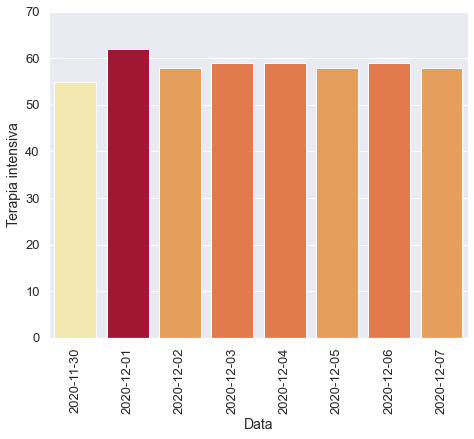

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

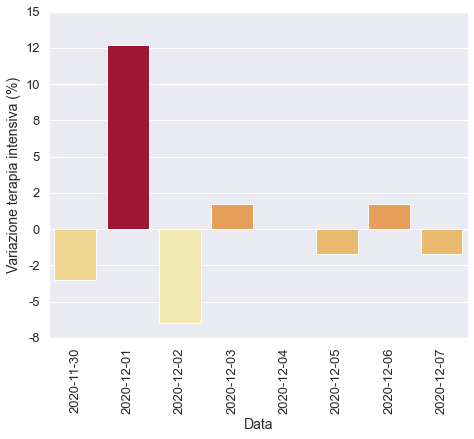

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

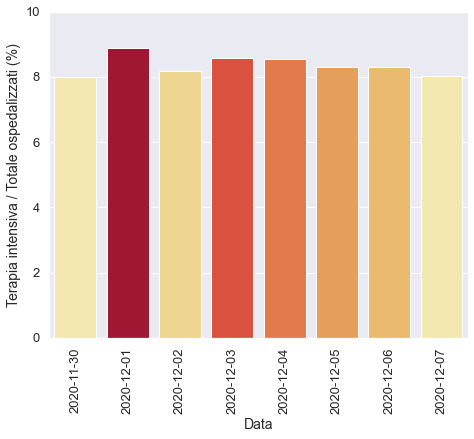

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

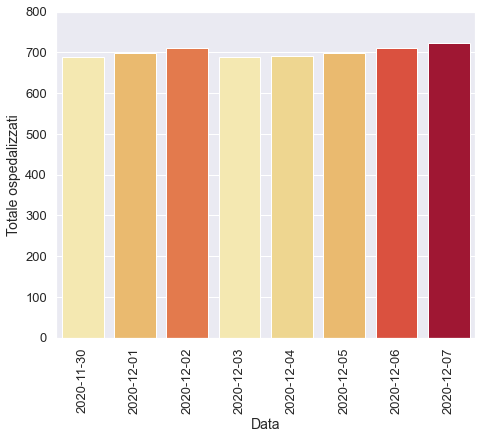

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

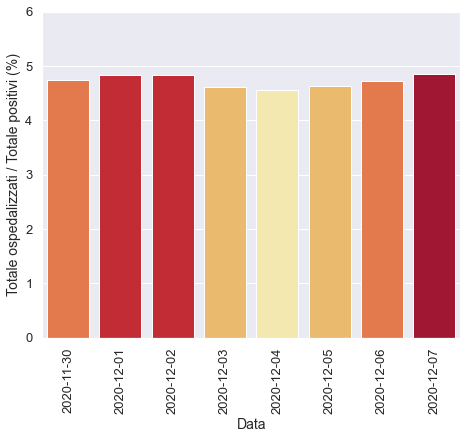

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

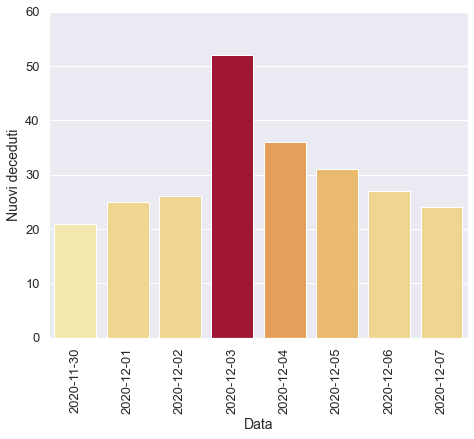

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

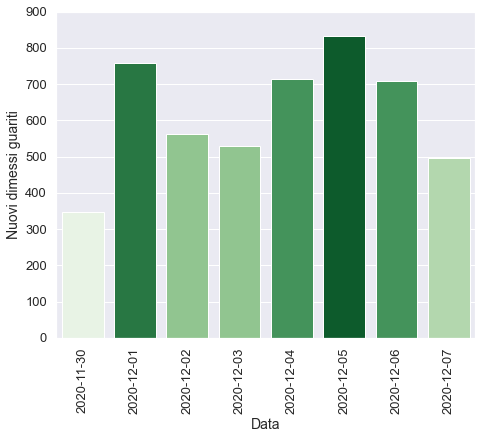

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)